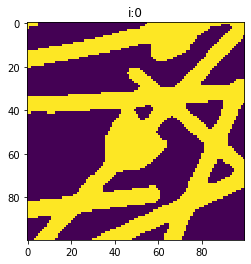

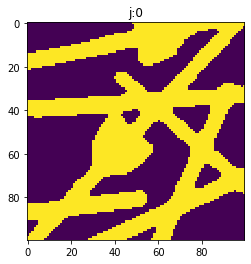

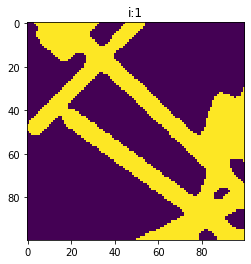

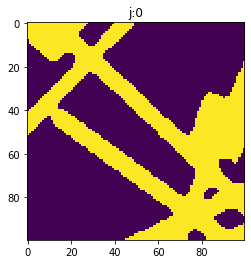

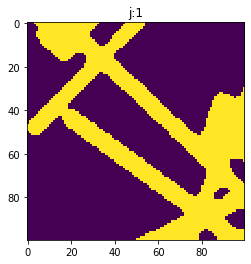

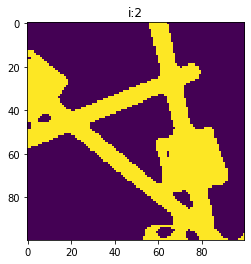

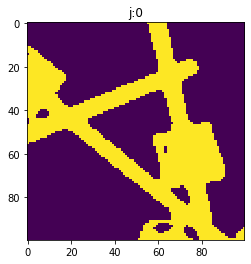

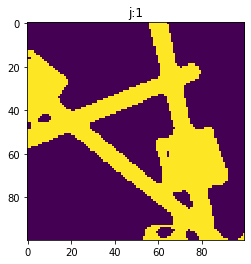

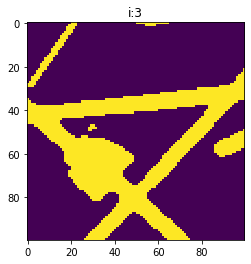

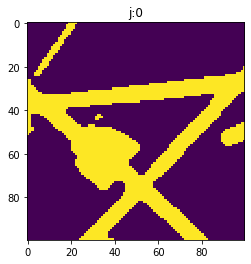

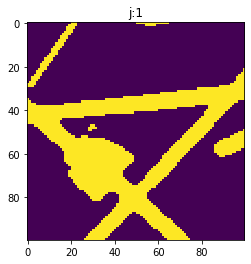

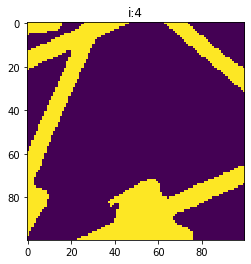

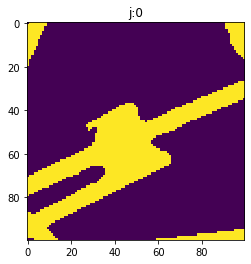

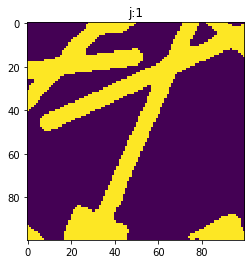

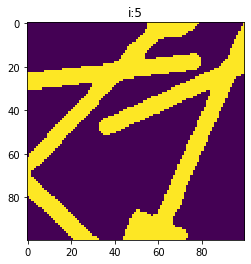

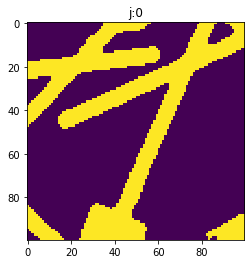

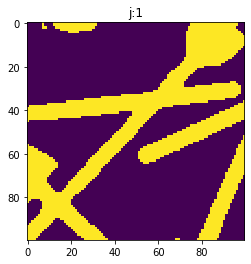

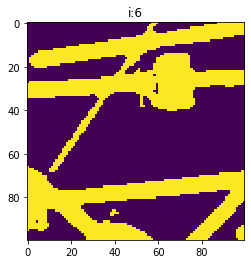

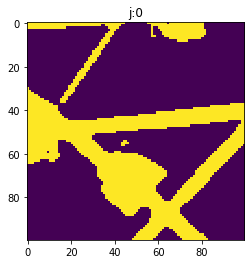

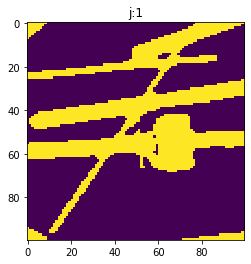

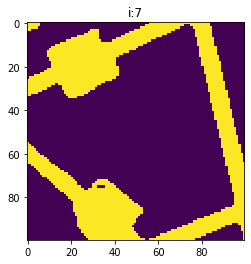

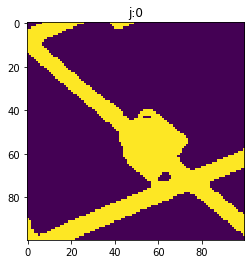

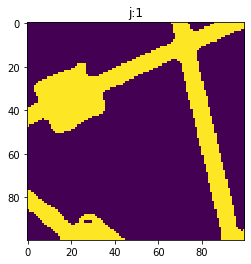

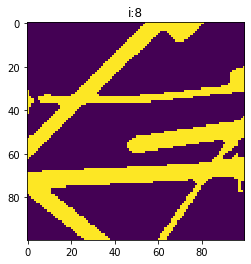

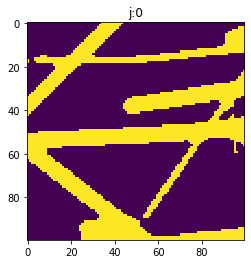

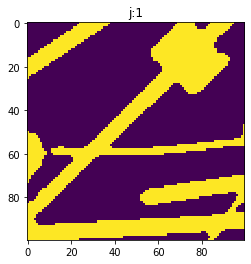

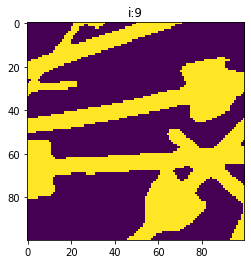

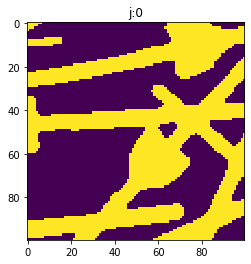

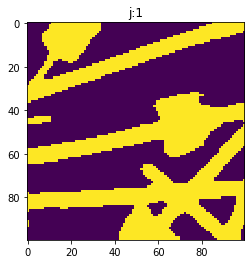

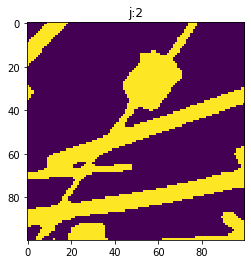

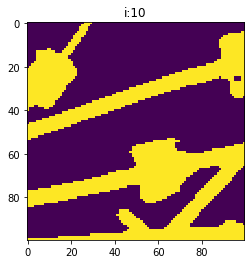

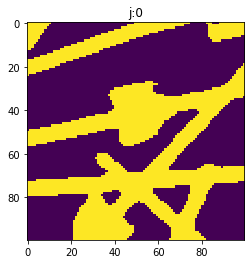

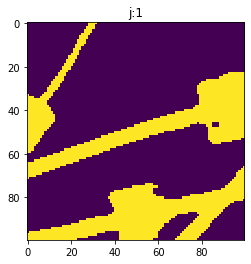

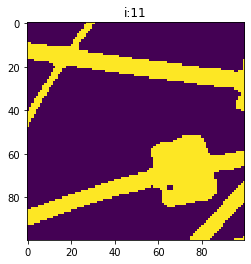

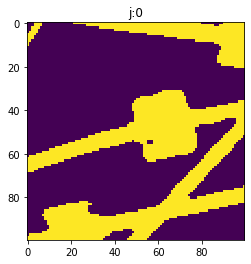

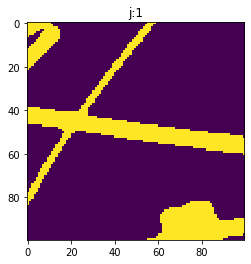

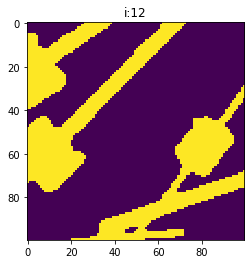

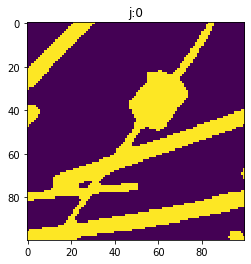

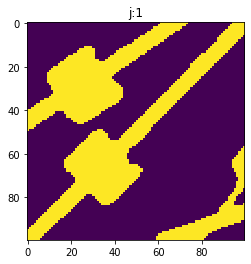

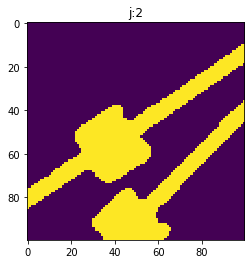

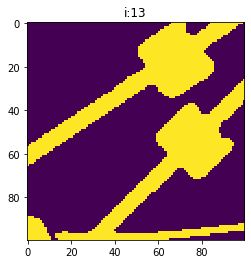

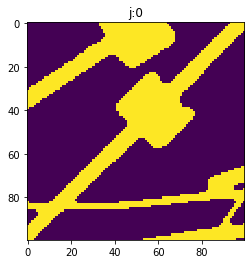

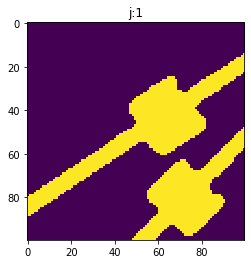

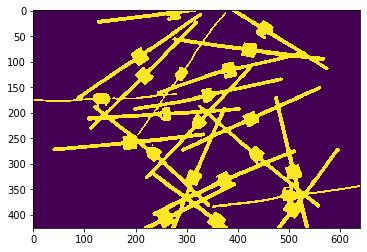

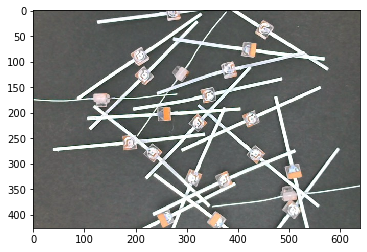

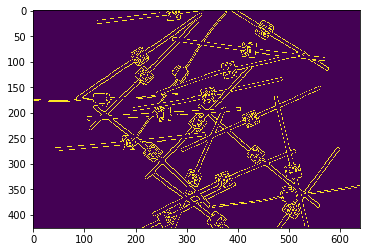

In [9]:
import cv2
import led_camera
import matplotlib.pyplot as plt
import numpy as np
thresh = 150
max_pixel = 255

size = 50

myLed = led_camera.ledCamera(camera=False)
img = cv2.imread("./pic1.jpg")

kernel = np.ones((5,5),np.float32)/25
filter_img = cv2.filter2D(img,-1,kernel)

hsv_img = cv2.cvtColor(filter_img, cv2.COLOR_BGR2HSV_FULL)  
hsv_img = hsv_img[:,:,2]
#gry_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


ret,new_hsv = cv2.threshold(hsv_img,thresh,max_pixel,cv2.THRESH_BINARY)
#ret,new_gry = cv2.threshold(gry_img,thresh,max_pixel,cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(
                    new_hsv,
                    cv2.RETR_TREE, 
                    cv2.CHAIN_APPROX_NONE
                    )
i = 0
j = 0
for cnt in contours:
    # モーメント
    M = cv2.moments(cnt)
    if M['m00'] < 500:
        continue
    # 重心
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    # 重心を中心に画像を切り取り
    if cx < 50:
        continue
    if cx > new_hsv.shape[1] - 50:
        continue
    if cy < 50:
        continue
    if cy > new_hsv.shape[0] - 50:
        continue

    x0 = cx - size
    x1 = cx + size
    y0 = cy - size
    y1 = cy + size
        
    cut_img = new_hsv[y0:y1,x0:x1]
    plt.imshow(cut_img)
    plt.title("i:{0}".format(i))
    plt.show()
    
    # 切り取った画像から重心を抽出
    contours2, hierarchy2 = cv2.findContours(
                    cut_img,
                    cv2.RETR_TREE, 
                    cv2.CHAIN_APPROX_NONE
                    )
    j = 0
    for cnt2 in contours2:
        M2 = cv2.moments(cnt2)
        if M2['m00'] < 500:
            continue
        new_cx = int(M2['m10']/M2['m00']) + x0
        new_cy = int(M2['m01']/M2['m00']) + y0
        if new_cx < 50:
            continue
        if new_cx > new_hsv.shape[1] - 50:
            continue
        if new_cy < 50:
            continue
        if new_cy > new_hsv.shape[0] - 50:
            continue
            
        nx0 = new_cx - size
        nx1 = new_cx + size
        ny0 = new_cy - size
        ny1 = new_cy + size
            
        cut_img2 = new_hsv[ny0:ny1,nx0:nx1]
        plt.imshow(cut_img2)
        plt.title("j:{0}".format(j))
        plt.show()
        j += 1
        
    i += 1

    
#img = cv2.drawContours(filter_img, contours, -1, (0,255,0), 3)


img_can = cv2.Canny(img,100,200)

plt.imshow(new_hsv)
plt.show()
plt.imshow(img)
plt.show()
plt.imshow(img_can)
plt.show()